In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
def plot_svm_boundary(model,X,y):
    
    X = X.values
    y = y.values
    
    # Scatter Plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic')

    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show() 
    

<Axes: xlabel='Med_1_mL', ylabel='Med_2_mL'>

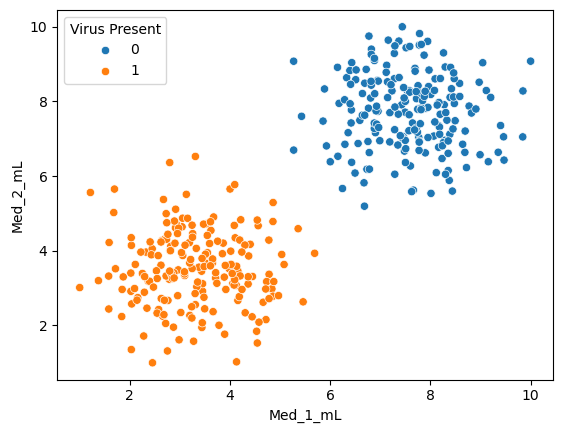

In [7]:
df = pd.read_csv('mouse_viral_study.csv')
sns.scatterplot(x='Med_1_mL', y='Med_2_mL', hue='Virus Present', data=df)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


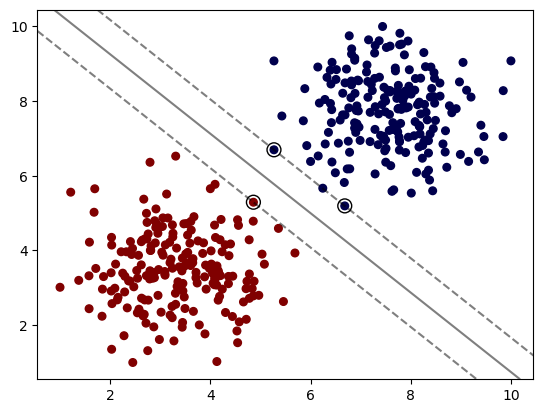

In [11]:
from sklearn.svm import SVC
y = df['Virus Present']
X = df.drop('Virus Present', axis = 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.svm import SVC
model = SVC(kernel='linear', C=1000)
model.fit(X,y)

plot_svm_boundary(model, X, y)


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


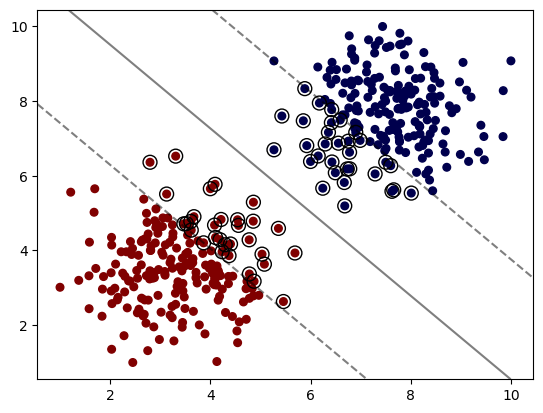

In [12]:
model = SVC(kernel='linear', C=0.005)
model.fit(X, y)
plot_svm_boundary(model, X, y)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


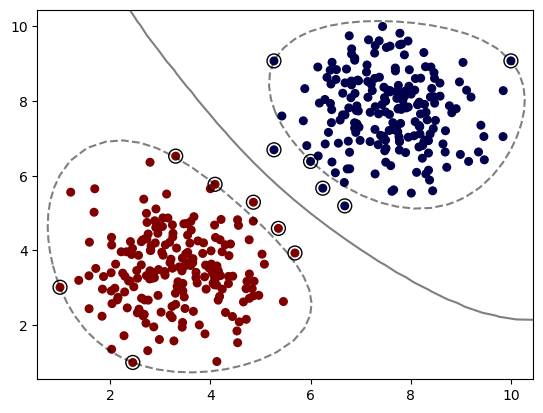

In [18]:
model = SVC(kernel='rbf', C=1)
model.fit(X, y)
plot_svm_boundary(model, X, y)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


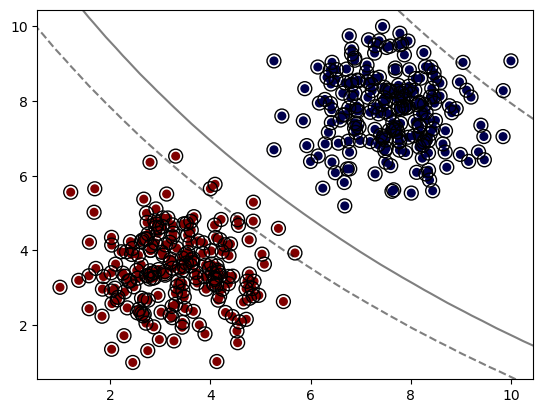

In [19]:
model = SVC(kernel='sigmoid', C=1)
model.fit(X, y)
plot_svm_boundary(model, X, y)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


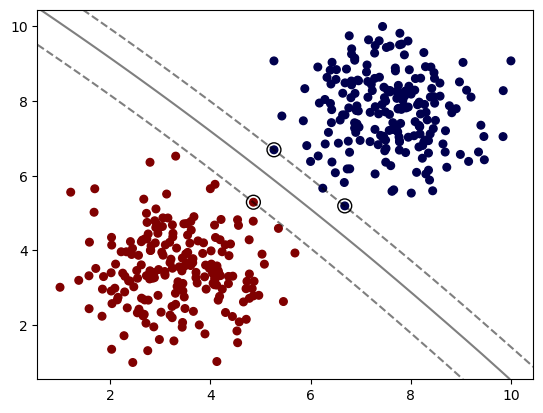

In [20]:
model = SVC(kernel='poly', degree=4, C=0.05)
model.fit(X, y)
plot_svm_boundary(model, X, y)

In [21]:
from sklearn.model_selection import GridSearchCV
svm = SVC()
param_grid = {'C':[0.01, 0.1, 1], 'kernel':['linear', 'rbf']}
grid = GridSearchCV(svm, param_grid)
grid.fit(X, y)
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}